<a href="https://colab.research.google.com/github/Mike-AG2021/Analisis-Inteligente-de-Datos/blob/main/Pyhton%20documentos/Caso_2_Comparaci%C3%B3n_y_evaluaci%C3%B3n_de_m%C3%A9tricas_de_regresi%C3%B3n_lineal_simple_vs_regresi%C3%B3n_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 2. Comparación y evaluación de métricas de regresión lineal simple vs regresión polinomial
#Autor: Jesús Miguel Acosta Gurrola
#Fecha: 10/03/2022

# Objetivo
Construir modelos de regresión lineal simple y polinómico importando datos FIFA con variable Overall y Valor para realizar predicciones y evaluar y comparar su rendimiento.





# Descripción

* Cargar librerías

* Cargar datos de FIFA

* Métricas a evaluar

* Explorar datos

* Variables independiente y dependiente

* Visualizar dispersión de los datos

* Construir datos de entrenamiento y datos de validación.

* Regresión Lineal Simple

* Construir el modelo

* Predicciones

* Metricas del modelo

* Regresión Polinómica de segundo

* Construir el modelo

* Predicciones

* Métricas del modelo

* Regresión Polinómica de quinto nivel

* Construir el modelo

* Predicciones

* Métricas del modelo

* Interpretación

#Métricas a valorar en los modelos
Se van a realizar y evaluar métricas de las predicciones con los modelos de regresión lineal simple y regresión polinómica con los mismos datos.

Los modelos se aceptan si las métricas cumplen estos requisitos:

El valor de R Square y R Square ajustado sobrepasa el 50%,

Que sus variables sea estadísticamente significativas al 95%. Al menos un ‘*’

Que el valor de RMSE (Raiz del Error Estándar Medio) sea menor que : 2 000 000 (dos millones).

Al final se deben comparar los modelos.

# Desarrollo

## Cargar librerías

In [ ]:

import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Procesado del modelo
# ==============================================================================
from scipy.stats import  pearsonr # Para correlación
from sklearn.linear_model import LinearRegression # Para regresión
from sklearn.model_selection import train_test_split # Partir datos
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score # R Square
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn import linear_model




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cargar los datos

In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv", encoding= 'unicode_escape')
datos[['Overall', 'Valor']]



,Overall,Valor
0,94,110500000
1,94,77000000
2,92,118500000
3,91,72000000
4,91,102000000
...,...,...
17902,47,60000
17903,47,60000
17904,47,60000
17905,47,60000


# Variables independiente y dependiente
Se identifican dos variables numéricas de interés:

Overall: Reputación y jerarquía internacional numérica del jugador

Valor: Sería el valor económico internacional de los jugadores

Se define a la variable independiente como Overall y la variable dependiente Valor, es decir, Overall impacta sobre Value o los valores de la variable Valor dependen de Overall.

Las variables de interés son Overall como variable independiente que significa el valor cuantitativo entre 0 y 100 de un jugador de futbol a nivel internacional y la variable Valor que es el estimado económico que vale un jugador de fútbol a nivel mundial



In [ ]:
datos[['Overall', 'Valor']].describe()

,Overall,Valor
count,17907.000000,1.790700e+04
mean,66.239571,2.450133e+06
std,6.926818,5.633207e+06
min,46.000000,1.000000e+04
25%,62.000000,3.250000e+05
50%,66.000000,7.000000e+05
75%,71.000000,2.100000e+06
max,94.000000,1.185000e+08


In [ ]:
datos['Overall'].describe()

count    17907.000000
mean        66.239571
std          6.926818
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [ ]:
datos['Valor'].describe()

count    1.790700e+04
mean     2.450133e+06
std      5.633207e+06
min      1.000000e+04
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.185000e+08
Name: Valor, dtype: float64

## Diagrama de dispersión de los datos

Se muestra el diagrama de dispersión con todo el conjunto de datos

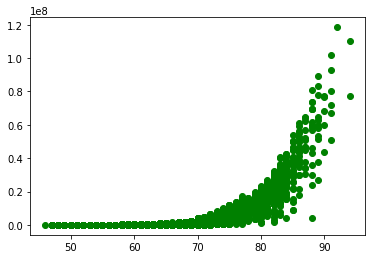

In [ ]:
from matplotlib import pyplot as plt
 
# Convertirlo a arreglos independiente 
Overall = datos['Overall'].values.reshape(-1, 1) # Variable independiente
Valor = datos['Valor'].values.reshape(-1, 1) # Variable dependiente
plt.scatter(x=Overall,y=Valor, color= 'green') 

Se observa que la relación de los datos no es del todo lineal, pero se construirán los modelos de regresión lineal simple y polinómico con las mismas variables.

Datos de entrenamiento y datos de validación

Sembrar semilla para la aleatoriedad de los datos

# Codigo para obtener el ploteo el cual nos mostrara el gráfico con el cual obtendremos el ploteo de los datos el cual nos lo muestra en el grafico de la disperción
```
#
Overall = datos['Overall'].values.reshape(-1, 1) # Variable independiente
Valor = datos['Valor'].values.reshape(-1, 1) # Variable dependiente
plt.scatter(x=Overall,y=Valor)
```



## Construir datos de entrenamiento y validación
# Se parten los datos 70% datos de entrenamiento y 30% datos de validación


In [ ]:
Overall = datos['Overall']
Valor = datos['Valor']


entrena_Overall, valida_Overall, entrena_Valor, valida_Valor = train_test_split(
                                        Overall.values.reshape(-1,1),
                                        Valor.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 2021,
                                        shuffle      = True
                                    )



### Datos de entrenamiento

In [ ]:
entrenamiento = pd.DataFrame(np.concatenate((entrena_Overall, entrena_Valor), axis=1))
entrenamiento.columns = ['Overall', 'Valor']
entrenamiento

,Overall,Valor
0,63,500000
1,62,270000
2,84,25000000
3,72,3300000
4,71,3000000
...,...,...
14320,60,230000
14321,57,230000
14322,73,3700000
14323,52,70000


De manera aleatoria se construyen los datos de entrenamiento y los datos de validación.

En la variable entrena se generan los registros que van a ser los datos de entrenamiento, de tal forma que los datos de validación serán los que no sena de entrenamiento "entrenamiento".

### Datos de validación

In [ ]:
validacion = pd.DataFrame(np.concatenate((valida_Overall, valida_Valor), axis=1))
validacion.columns = ['Overall', 'Valor']
validacion

,Overall,Valor
0,70,1400000
1,70,1400000
2,62,200000
3,68,900000
4,59,220000
...,...,...
3577,59,300000
3578,65,450000
3579,68,1100000
3580,66,675000


### Diagrama de dispersión con datos de entrenamiento

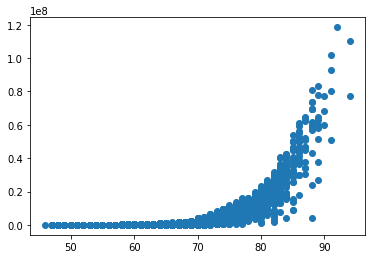

In [ ]:
Overall = entrenamiento['Overall'].values.reshape(-1, 1) # Variable independiente
Valor = entrenamiento['Valor'].values.reshape(-1, 1) # Variable dependiente
plt.scatter(x=Overall,y=Valor)


# Al igual que en el caso de arriba obtenos los valores del ploteo con 
plt.scatter(x=Overall,y=Valor) para que nos lo muestre en el gráfico




## Modelo de regresión lineal simple



Se evalúa el modelo de regresión lineal simple: 

$$
MAE = Pendiente ...
$$

$$
MSE = \frac{\sum(predicho_i - real_i)^{2}}{n}
$$

$$
RMSE = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

$$
\text{Multipel R Squared } = R^2 = cor(x, y)^2 \text{; de Pearson}
$$

In [ ]:
overall = datos[['Overall']].to_numpy()
valor = datos[['Valor']].to_numpy()

In [ ]:
overall_train, Overall_test, valor_train, valor_test = train_test_split(overall, valor, test_size=0.3, random_state=4042)

In [ ]:
overall_train

array([[70],
       [65],
       [65],
       ...,
       [54],
       [60],
       [55]])

### Construyendo el modelo de regresión lineal simple

In [ ]:
modelo_lin = LinearRegression()
modelo_lin.fit(X = entrena_Overall.reshape(-1, 1), y = entrena_Valor)

y_pred = modelo_lin.predict(Overall)

#### Coeficientes del modelo

Se determinan los valores de a y b de la fórmula
$$
Y=a+bx 
$$
ó
$$
Y=β0+β1⋅x
$$

Se determinan los valores de a y b de la fórmula $Y=a+bx$

### Evaluando el modelo de regresión lineal simple

In [ ]:
print("Coeficiente de la intercepción:", modelo_lin.intercept_)
print("Coeficiente de la pendiente", modelo_lin.coef_)
print("Coeficiente de determinación R^2 o R Square:", modelo_lin.score(X = entrena_Overall, y = entrena_Valor))

Coeficiente de la intercepción: [-31877557.09451763]
Coeficiente de la pendiente [[518211.64673767]]
Coeficiente de determinación R^2 o R Square: 0.39403180990256004


# Se construye el modelo

In [ ]:
modelo = linear_model.LinearRegression()
modelo

LinearRegression()

modelo de regresion lineal

In [ ]:
x = datos[['Overall']].to_numpy()
y = datos[['Valor']].to_numpy()
print(x)
print(y)

modelo.fit(x, y)

[[94]
 [94]
 [92]
 ...
 [47]
 [47]
 [46]]
[[110500000]
 [ 77000000]
 [118500000]
 ...
 [    60000]
 [    60000]
 [    60000]]


LinearRegression()

In [ ]:
b = modelo.coef_
a = modelo.intercept_
print("Valor de a: ", a)
print("Valor de b: ", b)

Valor de a:  [-31577480.47127337]
Valor de b:  [[513705.21889192]]


Se construye la recta de regresión con los datos de entrenamiento y el modelo construído a partir de estos datos.
Con la el valor de los valores de tendencia o valores ajustados del modelo se visualiza la recta de tendencia del modelo.

La gráfica g se construye por partes, primero la dispersión, segundo la linea de tendencia, tercero se agrega el título, para luego solo mostrar la gráfica g.

###Linea de tendencia del modelo


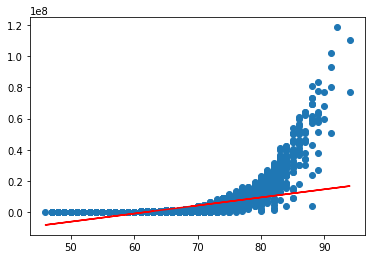

In [ ]:
plt.scatter(x= entrena_Overall, y= entrena_Valor)
plt.plot(Overall, y_pred, color='r')
plt.show()

### Interpretar el modelo de regresión lineal simple

En la gráfica de dispersión de las variables Overall y Valor se observa una relación entre las variables de manera curva o polinómica y poco lineal.

El modelo de regresión lineal simple presenta un valor de R Square de 39.31%, significa que la variable Overall representa ese porcentaje sobre la variable Valor.

Si hay cantidades de Overall por debajo de 60 o aproximado menor que 60 cualquier predicción sale negativa.

#### Predicciones regresión lineal simple

Se elige algun valor del conjunto de datos de validación para comparar el valor real con el valor de la predicción con el modelo de regresión lineal simple.


In [ ]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred_lin = modelo_lin.predict([[a_predecir]])
pred_lin
print("La predición con el modelo lineal simple de un valor de ", a_predecir, " es de ", float(pred_lin), " la real conforme a datos de validación es de: ", validacion.loc[registro,'Valor'])


Overall       47
Valor      60000
Name: 10, dtype: int64
47
La predición con el modelo lineal simple de un valor de  47  es de  -7521609.697846971  la real conforme a datos de validación es de:  60000


In [ ]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred_lin = modelo_lin.predict([[a_predecir]])
pred_lin
print("La predición con el modelo lineal simple de un valor de ", a_predecir, " es de ", float(pred_lin), " la real conforme a datos de validación es de: ", validacion.loc[registro,'Valor'])

Overall        66
Valor      550000
Name: 500, dtype: int64
66
La predición con el modelo lineal simple de un valor de  66  es de  2324411.5901688263  la real conforme a datos de validación es de:  550000


In [ ]:
registro = 1000
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']


print(a_predecir)
pred_lin = modelo_lin.predict([[a_predecir]])
pred_lin
print("La predición con el modelo lineal simple de un valor de ", a_predecir, " es de ", float(pred_lin), " la real conforme a datos de validación es de: ", validacion.loc[registro,'Valor'])

Overall        64
Valor      525000
Name: 1000, dtype: int64
64
La predición con el modelo lineal simple de un valor de  64  es de  1287988.2966934778  la real conforme a datos de validación es de:  525000


## Modelo polinómico de segundo nivel

Se crea un modelo polinómico con los mismos datos de entremiento y evaluar el R Square así como las predicciones con los datos de validación.

primero se crea una variable polyn que tiene características de una ecuación se segundo nivel.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
 
polyn = PolynomialFeatures(degree=2)

x_poly = polyn.fit_transform(Overall)

print(Overall)
print(x_poly)

[[63]
 [62]
 [84]
 ...
 [73]
 [52]
 [69]]
[[1.000e+00 6.300e+01 3.969e+03]
 [1.000e+00 6.200e+01 3.844e+03]
 [1.000e+00 8.400e+01 7.056e+03]
 ...
 [1.000e+00 7.300e+01 5.329e+03]
 [1.000e+00 5.200e+01 2.704e+03]
 [1.000e+00 6.900e+01 4.761e+03]]


Luego se crea el modelo de regresión polinomial de segundo nivel


[[63]
 [62]
 [84]
 ...
 [73]
 [52]
 [69]]
[[-1009705.16091865]
 [-1129976.37998906]
 [24509312.37283695]
 ...
 [ 5667607.4900893 ]
 [ 3141911.88961148]
 [ 1802224.14743787]]


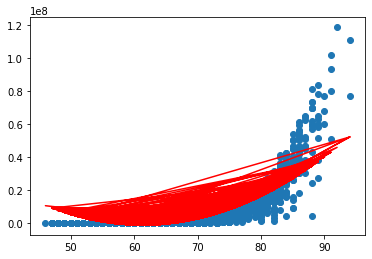

RMSE: 2798474.5909011485
R2: 0.7602552025070977


In [ ]:
modelo_pol2 = LinearRegression()
modelo_pol2.fit(x_poly, Valor)

y_pred = modelo_pol2.predict(x_poly)
print(Overall)
print(y_pred)

 
plt.scatter(Overall, Valor)
plt.plot(Overall, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(Valor,y_pred))
r2 = r2_score(Valor,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

El valor de R Square en el modelo polinómico de segundo nivel es del 75.94% en comparación con el modelo de regresión lineal simple de 39.31% es mucho mayor lo que representa una predicción más util y con mayor representatividad.



## Predicciones con modelo de regresió polinomila de segundo nivel


In [ ]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print(pred2)

Overall       47
Valor      60000
Name: 10, dtype: int64
47
[[9010538.1564374]]


In [ ]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']
print(a_predecir)
pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print(pred2)

Overall        66
Valor      550000
Name: 500, dtype: int64
66
[[-51662.36258343]]


In [ ]:
# registro = 500
# print(validacion.loc[registro])

a_predecir = 85
print(a_predecir)
pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print(pred2)

85
[[26819423.77602899]]


## Modelo polinómico de quinto nivel



In [ ]:
polyn = PolynomialFeatures(degree=5)

x_poly = polyn.fit_transform(Overall)

print(Overall)
print(x_poly)

[[63]
 [62]
 [84]
 ...
 [73]
 [52]
 [69]]
[[1.00000000e+00 6.30000000e+01 3.96900000e+03 2.50047000e+05
  1.57529610e+07 9.92436543e+08]
 [1.00000000e+00 6.20000000e+01 3.84400000e+03 2.38328000e+05
  1.47763360e+07 9.16132832e+08]
 [1.00000000e+00 8.40000000e+01 7.05600000e+03 5.92704000e+05
  4.97871360e+07 4.18211942e+09]
 ...
 [1.00000000e+00 7.30000000e+01 5.32900000e+03 3.89017000e+05
  2.83982410e+07 2.07307159e+09]
 [1.00000000e+00 5.20000000e+01 2.70400000e+03 1.40608000e+05
  7.31161600e+06 3.80204032e+08]
 [1.00000000e+00 6.90000000e+01 4.76100000e+03 3.28509000e+05
  2.26671210e+07 1.56403135e+09]]


[[63]
 [62]
 [84]
 ...
 [73]
 [52]
 [69]]
[[  386388.92014484]
 [  335235.41038589]
 [29850018.34084754]
 ...
 [ 3785860.97600131]
 [   66093.70057116]
 [ 1442109.35205083]]


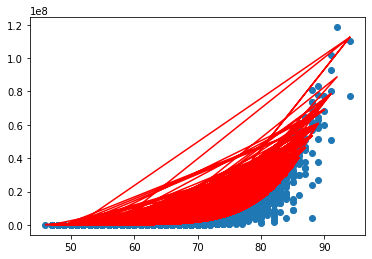

RMSE: 1794814.8159258044
R Square : 0.9013843713835575


In [ ]:
modelo_pol5 = LinearRegression()
modelo_pol5.fit(x_poly, Valor)

y_pred = modelo_pol5.predict(x_poly)
print(Overall)
print(y_pred)

 
plt.scatter(Overall, Valor)
plt.plot(Overall, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(Valor,y_pred))
r2 = r2_score(Valor,y_pred)
print ('RMSE: ' + str(rmse))
print ('R Square : ' + str(r2))

El valor de R Square en el modelo polinómico de quinto nivel esde 90.12% mayor que el valor del R Square del modelo polinómioc de egundo nivel con 75.94% en comparación con el modelo de regresión lineal simple de 39.31% es mucho mayor lo que representa una predicción más util y con mayor representatividad.

In [ ]:
poly_reg =  PolynomialFeatures(degree = 5)
overall_poly = poly_reg.fit_transform(overall_train)
modelo_poly5 = LinearRegression()
modelo_poly5.fit(overall_poly, valor_train)

LinearRegression()

#Determinando métricas
Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Con la función flatten().tolist() convierte el arreglo a una lista de una dimensión.

## Predicciones con el modelo de regresión polinómico de quinto nivel


In [ ]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print(pred5)

In [ ]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']
print(a_predecir)
pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print(pred5)

Overall        66
Valor      550000
Name: 500, dtype: int64
66
[[694012.16718821]]


In [ ]:
a_predecir = 85
print(a_predecir)
pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print(pred5)

85
[[34716035.76039366]]


# Interpretación de todo el caso
# Conclusiones
Este modelo es muy util ya que en este caso 
nos ayudo a predecir y hacer una disperción 
de los datos graficados en el modelo polinomico de quinto nivel por la forma en que nos muestra los datos ya que es una manera mas acertada de representación grafica
es mejor que el modelo polinomico anterior en este caso
es un poco mas acertado.
En este caso a diferencia de los anteriores usamos
el api de statsmodels el cual en conjunto con las librerias de
sklear y la regresion lineal simple y polinomica nos dara el ploteo de los datos.
El análisis de regresión engloba a un conjunto de métodos estadísticos que usamos cuando tanto la variable de respuesta como la la(s) variable(s) predictiva(s) son contínuas y queremos predecir valores de la primera en función de valores observados de las segundas. En esencia, el análisis de regresión consiste en ajustar un modelo a los datos, estimando coeficientes a partir de las observaciones, con el fin de predecir valores de la variable de respuesa a partir de una (regresión simple) o más variables (regresión múltiple) predictivas o explicativas.

Entonces en este punto lo que se realizo fue

identificar a las variables predictivas relacionadas con una variable de respuesta

describir la forma de la relación entre estas variables y para derivar una función matemática óptima que modele esta relación

predecir la variable de respuesta a partir de la(s) explicativas o predictoras

Podemos observar en el primer coeficiente del modelo lo siguiente:
El “Valor de la predicción es : "135798.32165083"

El “Segundo valor de la predicción es: "694012.16718821"

Para los valores de a y b tenemos:
Valor de a:  "-31577480.47127337"
Valor de b:  "513705.21889192"

En el segundo caso de el coeficiente del modelo tenemos como valor lo siguiente:


El “Valor de la abcisa a es : "694012.16718821”

El “Valor de la pendiente b es: "34716035.76039366"

Determinando el rmse del valor nos da como resultado "1794814.8159258044"

En regresion polinomica de quinto nivel nos arrojo como resultado los siguientes datos:

"386388.92014484"
"335235.41038589"

